In [23]:
from callsetmerger.callsetmerger import Readers
from callsetmerger.recordcluster import GetVcfTypesKey,ClusterGraph
import trtools.utils.tr_harmonizer as trh
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

710


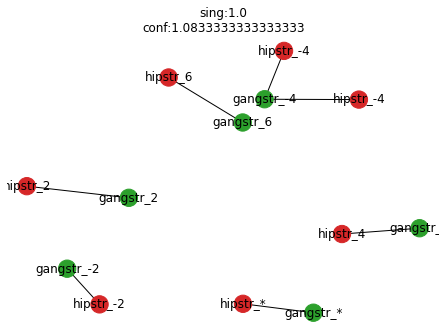

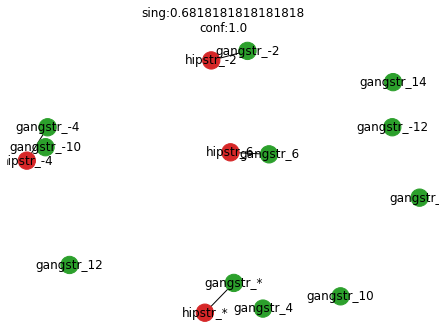

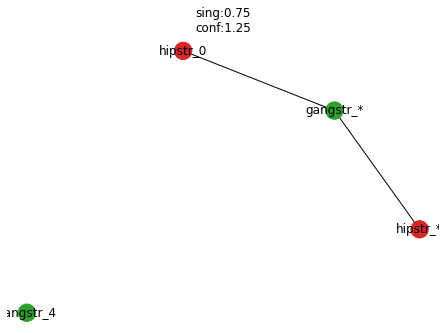

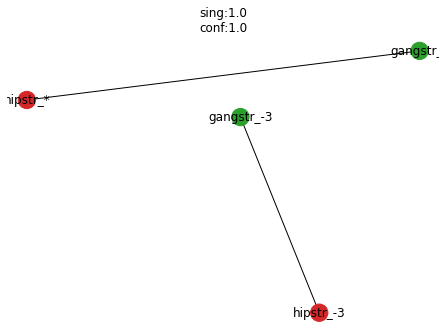

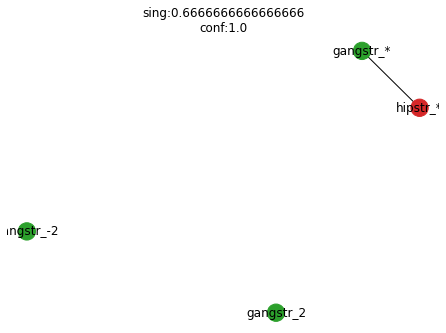

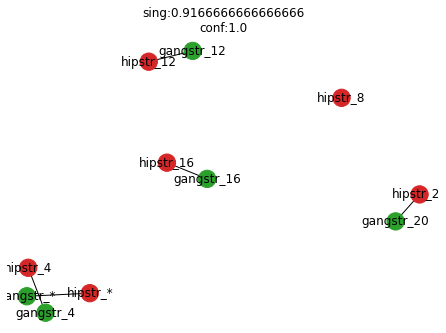

In [24]:
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
n = 0
m = random.randint(1, 1001)
print(m)
while not readers.done and n <= m:
    # Get mergeable calls
    rc_list = readers.getMergableCalls().RecordClusters
    n += 1
    for rc in rc_list:
        if sum(rc.vcf_types) == 1:
            continue
        allele_list = rc.GetAlleleList()
        cg = ClusterGraph(allele_list)
        nx.layout
        pos = nx.spring_layout(cg.graph, k=2 / np.sqrt(len(cg.graph.nodes)))
        nx.draw(cg.graph, pos, node_color=cg.colors)
        # for p in pos:  # push text to right
        #     pos[p][0] += 0.2
        nx.draw_networkx_labels(cg.graph, pos, labels=cg.labels)
        plt.title('sing:' + str(cg.GetSingularityScore())
                  + '\nconf:' + str(cg.GetConfusionScore()))
        # nx.draw_networkx(cg.graph, node_color=cg.colors, labels=cg.labels, seed=100)
        plt.show()
    # Move on
    readers.goToNext()

In [26]:
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
score_df = pd.DataFrame(columns=['singularity_score', 'confusion_score'])
while not readers.done:
    # Get mergeable calls
    rc_list = readers.getMergableCalls().RecordClusters
    for rc in rc_list:
        # if sum(rc.vcf_types) == 1:
        #     continue
        allele_list = rc.GetAlleleList()
        cg = ClusterGraph(allele_list)
        if cg.GetSingularityScore() == 1.0 and cg.GetConfusionScore() == 1.0:
            continue
        score_df = score_df.append({'singularity_score': cg.GetSingularityScore(),
                                    'confusion_score': cg.GetConfusionScore()},
                                   ignore_index=True)
    # Move on
    readers.goToNext()
score_df

,singularity_score,confusion_score
0,1.000000,1.083333
1,0.681818,1.000000
2,0.750000,1.250000
3,0.666667,1.000000
4,0.916667,1.000000
...,...,...
1634,1.000000,1.250000
1635,0.666667,1.000000
1636,1.000000,1.500000
1637,0.833333,1.000000


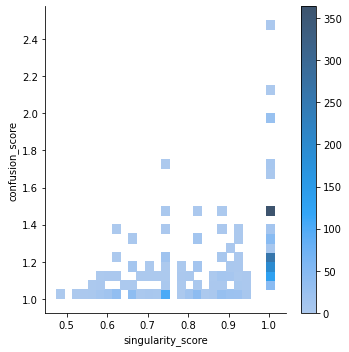

In [39]:
plt.style.use({'figure.facecolor':'white'})
sns.displot(data=score_df, x="singularity_score", y="confusion_score",
            cbar=True,binwidth=(0.02,0.05))